# Más Aprendizaje Hebbiano No Supervisado

En la clase sobre este tema vimos que para estos modelos podíamos prescindir de la unidad umbral que necesitábamos con el perceptrón, pero a cambio teníamos que garantizar que los datos estuvieran normalizados. Acá vamos a tratar de ver por qué pasa esto.

Además vimos un algoritmo que podía funcionar con varias reglas de aprendizaje cambiando un solo valor, y que gracias a esto nos permitía comparar fácilmente el comportamiento y las similaridades entre estas reglas. Pero con la desventaja de ser poco eficiente, ya que involucra varios ciclos anidados para hacer todas las operaciones por elemento. También vamos a aprovechar entonces para ver como implementar los modelos de Oja (generalizado) y Sanger eficientemente usando operaciones matriciales. Además vamos a ver cuál sería una buena condición de parada, para determinar que el entrenamiento haya finalizado.

In [1]:
import numpy as num
from matplotlib import pyplot as mpl

mpl.rcParams['figure.figsize'] = (5, 5)

Recordemos por qué necesitábamos un umbral de disparo con el perceptrón. Si tenemos un sencillo conjunto de datos como el siguiente, en donde representaremos la variable de entrada en el eje horizontal y el valor objetivo, que puede ser la probabilidad de pertenecer a cierta clase, en el eje vertical, podemos ver que la curva está desplaza del origen.

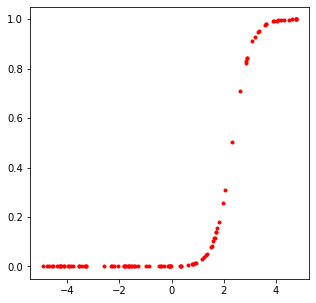

In [2]:
sigmoid = lambda x: 1./(1+num.exp(-x))

x = num.random.uniform( -5, 5, 100)
z = sigmoid( 3*x-7)

mpl.plot( x, z, 'r.')
mpl.show()

Es decir, si queremos que el perceptrón responda con +1 para valores objetivo cuya probabilidad es al menos del 50% entonces el umbral seguramente será aproximadamente de 2.3. Es decir, el valor del umbral de disparo permite desplazar los datos de manera que el punto de inflexión quede aproximadamente centrado en el origen.

Pero por otro lado, modelos como el de Oja o Sanger, están tratando de encontrar correlaciones en los datos de entrada, y como la unidad umbral podíamos pensarla como un dato de entrada extra fijo en 1, nos podemos dar cuenta que no solo este valor extra no me ayudaría a descubrir ninguna relación entre los otros datos de entrada, sino que por el contrario, afectaría en forma negativa el comportamiento del modelo y los resultados que pueda conseguir.

Veamos que sucede cuando intentamos usar conjuntos de datos que no estén normalizados con estos modelos.
Y primero quizás valga la pena aclarar que por normalizado nos referimos a que los datos se encuentren centrados en el origen y que, en conjunto, tengan aproximadamente varianza 1. Esto último es importante, ya que si dividimos por su varianza a cada variable independientemente perderemos información importante sobre las relaciones entre las variables.

En las siguientes figuras representaremos conjuntos de datos de 2 variables con puntos azules, y con flechas los pesos como vectores que podrían ser aprendidos por modelos como el de Sanger con 2 unidades de salida. En donde sea posible la flecha roja marcará los pesos correspondientes a la unidad de la componente principal y en verde el de la segunda componente. En todos los casos se trata de ejemplos que no pretenden ser exactos sino ilustrar claramente algún concepto.

En el primer ejemplo los datos se encuentran centrados en el origen pero con una gran dispersión. Aún en este caso el modelo puede aprender a reconocer la dirección en que los datos tienen mayor varianza y alinear los pesos de la unidad correspondiente a la componente principal con esta.

Un punto importante que vale la pena recordar es que las componentes principales son siempre ortogonales entre sí. De modo que una vez que se encuentra la componente principal en casos como estos no hay muchas posibilidades para la segunda componente.

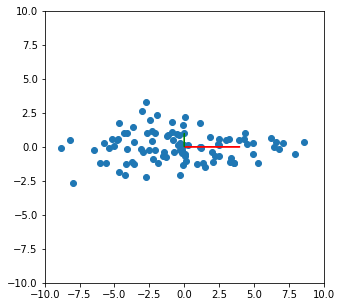

In [3]:
x = num.random.normal( 0,1, (100,2)) * (4,1)

mpl.xlim( -10, 10)
mpl.ylim( -10, 10)
mpl.scatter( x[:,0], x[:,1])
mpl.arrow( 0,0, 4,0, color='r')
mpl.arrow( 0,0, 0,1, color='g')
mpl.show()

Una de las aplicaciones más comunes para estas técnicas es la reducción de dimensionalidad. Esto es, representar los datos en un espacio de dimensión menor tratando de conservar la mayor cantidad de información posible. Es fácil de ver que si los datos tienen dos variables fuertemente correlacionadas podrían ser reemplazadas por solo una.

Pero, ¿qué pasa si no todas las instancias de datos pertenecen a la misma distribución?
En la siguiente figura se puede ver un conjunto de datos con dos cúmulos distintos. En este caso el modelo aún podría usarse para reducir la dimensión y hasta como clasificador, pero en general para este tipo de problemas estos modelos no son los más adecuados.

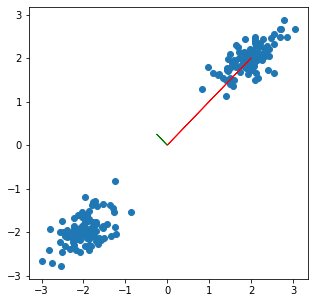

In [4]:
c1 = num.dot( num.random.normal(0,0.5,(100,2)), [[0.8,0.2],[0.3,0.7]]) + (2,2)
c2 = num.dot( num.random.normal(0,0.5,(100,2)), [[0.8,0.2],[0.3,0.7]]) - (2,2)
x = num.vstack((c1,c2))

mpl.scatter( x[:,0], x[:,1])
mpl.arrow( 0,0, 2,2, color='r')
mpl.arrow( 0,0, -0.25,0.25, color='g')
mpl.show()

Y un ejemplo muy claro es el siguiente. En este caso, a pesar de que los datos se encuentran normalizados y el modelo haya encontrado una buena solución, el resultado no me da ninguna ventaja sobre tratar con los datos originales y, si estuviera haciendo una reducción de dimensión, hasta perdería información importante.

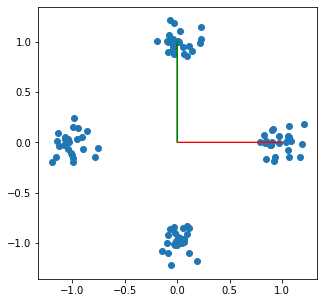

In [5]:
c1 = num.random.normal(0,0.1,(25,2)) + (0,1)
c2 = num.random.normal(0,0.1,(25,2)) + (1,0)
c3 = num.random.normal(0,0.1,(25,2)) + (0,-1)
c4 = num.random.normal(0,0.1,(25,2)) + (-1,0)
x = num.vstack( (c1, c2, c3, c4))

mpl.scatter( x[:,0], x[:,1])
mpl.arrow( 0,0, 1,0, color='r')
mpl.arrow( 0,0, 0,1, color='g')
mpl.show()

Y como últimos ejemplos veamos que sucede si los datos no se encuentran centrados en el origen. En el siguiente conjunto de datos tenemos dos variables correlacionadas y con varianza cercana a 1, pero desplazada del origen.

Desde el punto de vista del modelo, la dirección de mayor dispersión es siempre con respecto al origen, de modo que la componente principal se terminará orientando aproximadamente al centro de los datos. Podría pensarse que en cierta forma esto termina comportándose de forma similar a lo que vimos que hacía el umbral de disparo.

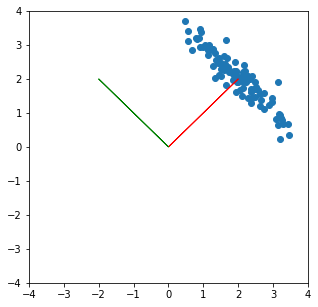

In [6]:
x = num.dot( num.random.normal(0,1,(100,2)), [[0.4,-0.6],[-0.6,0.4]]) + (2,2)

mpl.xlim(-4,4)
mpl.ylim(-4,4)
mpl.scatter( x[:,0], x[:,1])
mpl.arrow( 0,0, 2,2, color='r')
mpl.arrow( 0,0, -2,2, color='g')
mpl.show()

El problema se hace aún más notables en casos como el siguiente en donde, después de que la componente principal se alinea con el desplazamiento de los datos, la segunda componente, que debe ser ortogonal a la primera, ya no puede representar de forma útil la distribución de los datos originales.

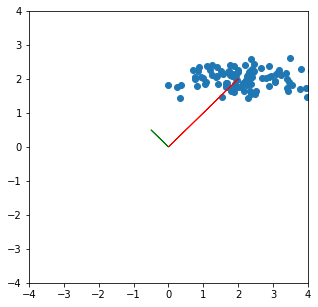

In [7]:
x = num.random.normal(0,0.5,(100,2)) * (2,0.5) + (2,2)

mpl.xlim(-4,4)
mpl.ylim(-4,4)
mpl.scatter( x[:,0], x[:,1])
mpl.arrow( 0,0, 2,2, color='r')
mpl.arrow( 0,0, -0.5,0.5, color='g')
mpl.show()

## Implementación de los algoritmos

En la clase vimos un algoritmo general para las distintas reglas de aprendizaje. Les recomiendo que lo implementen y experimenten con combinaciones de distintos datos y reglas de aprendizaje para mejor entender el comportamiento de estos modelos.

Tengan en cuenta un detalle importante que suele ser motivo de errores. En matemática los índices de los vectores y matrices suele empezar en 1, pero en muchos lenguajes de programación, como python, empiezan en 0. Por ejemplo para las capas de la arquitectura que vimos usamos la numeración 1 a N unidades de entrada y 1 a M unidades de salida. En python seguramente esto va a traducirse en 0 a N-1 y 0 a M-1. Tengan especial cuidado con esto cuando estén implementando el algoritmo.

Otro aspecto a tener en cuenta es que, debido a todos los ciclos anidados, la ejecución seguramente será lenta. Veamos también entonces como implementar la regla de Oja generalizada y la de Sanger usando operaciones matriciales para una ejecución mucho más eficiente.

Supongamos que tenemos nuestros pesos en un array **W** y una instancia de datos en el array **X**. Podemos seguir calculando la respuesta **Y** del modelo con el producto entre los dos arrays anteriores.

In [8]:
N = 5
M = 3

X = num.random.uniform( -1, 1, (1,N))
W = num.random.normal( 0, 0.1, (N,M))

Y = num.dot( X, W)

Si queremos calcular la reconstrucción de la entrada usando la regla de Oja podemos hacerlo simplemente con el producto entre la respuesta y la matriz de pesos transpuesta. A esta aproximación de la entrada la llamaremos **Z** en lugar de **~X** para simplificar la notación.

Con esto solo ya podemos calcular muy fácilmente las correcciones a los pesos.

In [9]:
Z = num.dot( Y, W.T)

dW = num.outer( X-Z, Y)

Para poder hacer esto mismo con la regla de Sanger las cosas son un poco más complicadas. Como necesitamos que no todas las unidades de salida participen en la aproximación de la entrada al mismo tiempo vamos a usar una matriz triangular superior **D** para que, al multiplicarla por la salida, tenga en cuenta estas condiciones.

In [10]:
D = num.triu( num.ones((M,M)))
Z = num.dot( W, Y.T*D)

Notar que al usar la operación **asterisco** para multiplicar estamos haciendo un productor del vector columna de la salida **Y.T** por cada columna de **D**. El producto de la matriz de pesos por esta última matriz es una nueva matriz **Z** cuyas columnas corresponderán a las aproximaciones de la entrada para cada unidad de salida respetando las restricciones de la regla de Sanger.

De forma similar, para finalmente calcular las correcciones de los pesos, la resta con **X.T** se hace columna a columna con la matriz **Z**, y el resultado es multiplicado fila a fila por el vector **Y**.

In [11]:
dW = (X.T - Z) * Y

Les recomiendo que vayan haciendo las operaciones a mano una a una para poder ir viendo los resultados individuales y siguiendo el proceso, ya que sé muy bien lo difícil y poco intuitivo que esto puede parecer.

Finalmente veamos cómo podemos determinar durante el entrenamiento en qué momento podemos considerar que el modelo aprendió lo que queríamos. 

Con el perceptrón simple podíamos comparar directamente la salida obtenida con la deseada y esto era suficiente para determinar si el modelo había aprendido a aproximarse a los objetivos. Con estos modelos sería tentador considerar de la misma forma que la diferencia **X-Z** es también un buen estimador de su comportamiento. Sin embargo, como lo que estamos haciendo es una reducción de dimensionalidad, intrínsecamente estamos perdiendo información, pero no podemos estimar a priori cuanto sería un nivel de error aceptable. De forma que este método no es práctico como condición de parada.

También sabemos que estos modelos suelen ser muy estables en su convergencia a una solución, de forma que podríamos monitorear los cambios en **dW** para detener el entrenamiento si estos comienzan a ser despreciables. O de manera análoga, podemos pensar en entrenar sencillamente por un número fijo y suficientemente grande de épocas para tratar de asegurar que se llegó a una buena solución. Esto también es especialmente tentador en conjunción con un coeficiente de aprendizaje adaptativo del estilo **lr=1/t** ya que la convergencia está asegurada para coeficientes chicos.

Sin embargo la condición más confiable de parada es comprobar la ortogonalidad de los pesos entre las unidades de salida. Todas las otras condiciones son sensibles a variaciones dependiendo del conjunto de datos, lo que las hace menos robustas. Al chequear la ortogonalidad sabemos que el modelo encontró un sub-espacio de menor dimensión en donde representar los datos preservando más información.

La ortogonalidad entre dos vectores se comprueba si el producto interno entre estos es igual a cero. Como debemos chequear la ortogonalidad entre todos los pares de pesos vamos a tener que multiplicar a la matriz **W** por sí misma transpuesta. Pero con esta operación nos quedará además en la diagonal el producto de cada peso por sí mismo, afortunadamente estos tienden a 1 de manera que podemos corregir sencillamente restando una matriz identidad. Finalmente sumamos los valores absolutos, dividiendo por 2 para compensar por las repeticiones entre los valores de la triangular superior e inferior.

In [12]:
o = num.sum(num.abs( num.dot( W.T, W) - num.identity(M) ))/2